In [1]:
# Import necessary libraries
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
import matplotlib.pyplot as plt

In [2]:
# Define a function to scale the spectrum of an image for visualization
def scale_spectrum(A):
    # Take the absolute value of the image, add 1 to avoid taking the log of 0,
    # take the log base 10, and return the real part of the result
    return np.real(np.log10(np.absolute(A) + np.ones(A.shape)))

# Define a function to create a Gaussian filter in the frequency domain
def make_gaussian_filter(num_rows, num_cols, sigma, high_pass=True):
    # Calculate the center of the filter
    center_i = int(num_rows/2) + 1 if num_rows % 2 == 1 else int(num_rows/2)
    center_j = int(num_cols/2) + 1 if num_cols % 2 == 1 else int(num_cols/2)

    # Define a function to calculate the value of the filter at a given point
    def gaussian(i,j):
        # Calculate the coefficient using the Gaussian function
        coefficient = np.exp(-1.0 * ((i - center_i)**2 + (j - center_j)**2) / (2 * sigma**2))
        # If high_pass is True, return 1 minus the coefficient, otherwise return the coefficient
        return 1 - coefficient if high_pass else coefficient

    # Create and return a 2D array representing the filter by applying the gaussian function to each point
    return np.array([[gaussian(i,j) for j in range(num_cols)] for i in range(num_rows)])

# Define a function to apply a filter in the frequency domain to an image
def filter_DFT(image_matrix, filter_matrix):
    # Calculate the DFT of the image and shift it so that the low frequencies are in the center
    shifted_DFT = fftshift(fft2(image_matrix))

    # Multiply the shifted DFT with the filter
    filtered_DFT = shifted_DFT * filter_matrix

    # Shift the filtered DFT back and calculate its inverse DFT to obtain the filtered image
    return ifft2(ifftshift(filtered_DFT))

# Define a function to apply a low-pass Gaussian filter to an image
def low_pass(image_matrix, sigma):
    n,m = image_matrix.shape
    # Create a low-pass Gaussian filter and apply it to the image using filter_DFT
    return filter_DFT(image_matrix, make_gaussian_filter(n, m, sigma, high_pass=False))

# Define a function to apply a high-pass Gaussian filter to an image
def high_pass(image_matrix, sigma):
    n,m = image_matrix.shape
    # Create a high-pass Gaussian filter and apply it to the image using filter_DFT
    return filter_DFT(image_matrix, make_gaussian_filter(n, m, sigma, high_pass=True))

# Define a function to create a hybrid image by combining a high-pass filtered version of one image with a low-pass filtered version of another image
def hybrid_image(high_freq_img, low_freq_img, sigma_high, sigma_low):
    # Apply a high-pass Gaussian filter to high_freq_img using the specified sigma_high
    high_passed = high_pass(high_freq_img, sigma_high)
    # Apply a low-pass Gaussian filter to low_freq_img using the specified sigma_low
    low_passed = low_pass(low_freq_img, sigma_low)

    # Add the two filtered images together to create a hybrid image
    return high_passed + low_passed

In [3]:
# Read two grayscale images
image1 = cv2.imread('Image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Image2.jpg', cv2.IMREAD_GRAYSCALE)

# Create a hybrid image by combining a high-pass filtered version of image1 with a low-pass filtered version of image2 using specified standard deviations for each filter and store it in variable hybrid.
hybrid = hybrid_image(image1, image2, 10, 10)

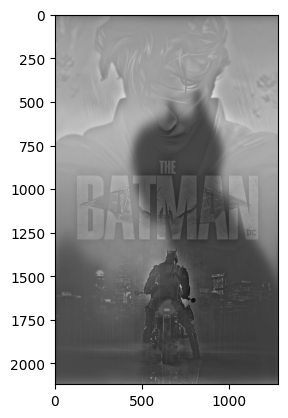

In [4]:
hybrid = np.real(hybrid)

plt.imshow(hybrid,cmap='gray')